In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
data=pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
#get ready the data
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.diagnosis = [1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x=data.iloc[:,1:]
#normalize x
x=(x-np.min(x))/(np.max(x)-np.min(x))

In [5]:
#get ready for classification
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [6]:
#random forest classification
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(x_train,y_train)
rf_ac=rf.score(x_test,y_test)
print("Accuracy of random state classifier is: {}".format(rf_ac))

Accuracy of random state classifier is: 0.9649122807017544


In [7]:
#let's see the confusion matrix (True positives,True negatives, False positives,False negatives)
from sklearn.metrics import confusion_matrix
y_predict=rf.predict(x_test)
cm=confusion_matrix(y_test,y_predict)
cm


array([[70,  1],
       [ 3, 40]])

In [8]:
#Let's see on table
rfcm= pd.DataFrame(cm,index=["Real Benign Tumors","Real Malign Tumors"],columns=["Test says Benign Tumor","Test says Malign Tumor"])

In [9]:
rfcm

,Test says Benign Tumor,Test says Malign Tumor
Real Benign Tumors,70,1
Real Malign Tumors,3,40


In [10]:
#Let's test in logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_ac=lr.score(x_test,y_test)
print("Accuracy of logistic regression is: {}".format(lr_ac))

Accuracy of logistic regression is: 0.9736842105263158


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
y_predict_lr=lr.predict(x_test)
cm_lr=confusion_matrix(y_test,y_predict_lr)
cm_lr

array([[71,  0],
       [ 3, 40]])

In [12]:
#let's see first on table
rfcm_lr= pd.DataFrame(cm_lr,index=["Real Benign Tumors","Real Malign Tumors"],columns=["Test says Benign Tumor","Test says Malign Tumor"])
rfcm_lr

,Test says Benign Tumor,Test says Malign Tumor
Real Benign Tumors,71,0
Real Malign Tumors,3,40


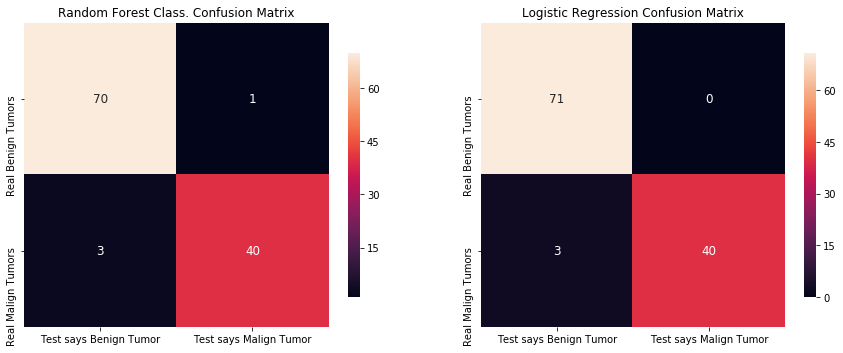


Accuracy of random state classifier is: 0.9649122807017544

Accuracy of logistic regression is: 0.9736842105263158


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15,15)) 
ax1 = fig.add_subplot(1, 2, 1) 
ax2 = fig.add_subplot(1, 2, 2)

sns.heatmap(data=rfcm, ax=ax1, square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})
sns.heatmap(data=rfcm_lr, ax=ax2,  square=True, cbar_kws={'shrink': .3}, annot=True, annot_kws={'fontsize': 12})

ax1.set_title("Random Forest Class. Confusion Matrix")
ax2.set_title("Logistic Regression Confusion Matrix")
plt.show(fig)

print("\nAccuracy of random state classifier is: {}".format(rf_ac))
print("\nAccuracy of logistic regression is: {}".format(lr_ac))